In [1]:
%matplotlib inline
#%matplotlib notebook

import numpy as np

from runners.vStirapRunner import ExperimentalRunner, Atom4lvl, Cavity, CavityBiref, LaserCoupling, CavityCoupling

i = np.complex(0,1)

Pre-compiled Hamiltonian, ExperimentalRunner_Hamiltonian_2_26247.pyx, is suitable to run this experiment.
18.84955592153876
Running simulation with 501 timesteps...finished in 0.085 seconds


(<matplotlib.figure.Figure at 0x120e6c048>,
 <matplotlib.figure.Figure at 0x1211ff278>)

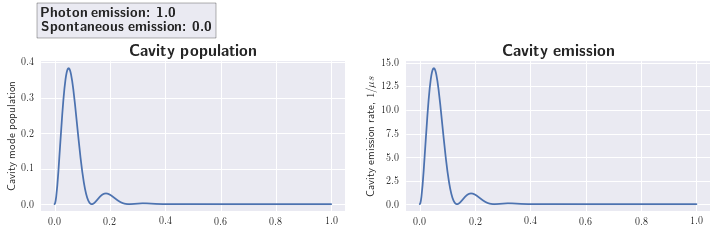

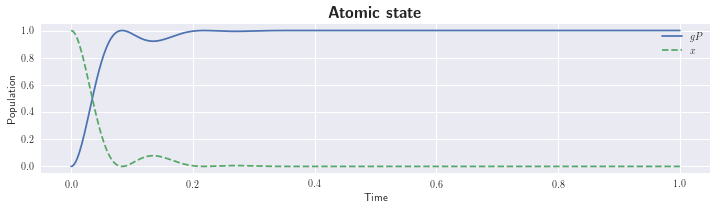

In [5]:
g, kappa, gamma = 4,3,0
g, kappa, gamma = [x*2*np.pi for x  in [g, kappa, gamma]]

atom4lvl = Atom4lvl(gamma=gamma, configured_states=['x','gP'])

# cav = CavityBiref(g=g, kappa1=kappa, kappa2=kappa, R_CL=[[1,0],[0,1]])

cav = Cavity(g=g, kappa=kappa)

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True,
                            reconfigurable_decay_rates=True)

psi0 = runner.ket('x',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()